In [1]:
%matplotlib inline
import requests
import pandas as pd

import os
import sys
path = os.path.abspath('../')
sys.path.append(path)

In [2]:
from cgsn_parsers.parsers.parse_flort import Parser

In [3]:
# Coastal Endurance Oregon Shelf Surface Mooring NSIF (7 meters) flort data
baseurl = "https://rawdata.oceanobservatories.org/files/CE02SHSM/D00004/cg_data/dcl27/flort/"
fname = "20170404.flort.log"

# initialize the Parser object for MOPAK
flort = Parser(baseurl + fname)
r = requests.get(flort.infile, verify=True) # use verify=False for expired certificate

In [4]:
flort.raw = r.content.decode('utf-8').splitlines()
len(flort.raw), flort.raw[:5]

(14274,
 ['2017/04/04 00:00:13.158 [flort:DLOGP2]:Instrument sampling - Data logger entering data acquisition state',
  '2017/04/04 00:00:13.195 03/17\t23:56:50\t700\t269\t695\t190\t460\t68\t555',
  '2017/04/04 00:00:14.324 04/03/17\t23:56:51\t700\t292\t695\t186\t460\t67\t555',
  '2017/04/04 00:00:15.454 04/03/17\t23:56:52\t700\t237\t695\t157\t460\t65\t555',
  '2017/04/04 00:00:16.583 04/03/17\t23:56:53\t700\t216\t695\t198\t460\t66\t555'])

In [5]:
flort.parse_data()
flort.data.keys()

dict_keys(['raw_signal_cdom', 'raw_signal_chl', 'measurement_wavelength_cdom', 'time', 'flort_date_time_string', 'measurement_wavelength_chl', 'raw_internal_temp', 'raw_signal_beta', 'dcl_date_time_string', 'measurement_wavelength_beta'])

In [6]:
flort.data.time[:5]

[1491264013.195,
 1491264014.324,
 1491264015.454,
 1491264016.583,
 1491264017.727]

In [7]:
df = pd.DataFrame(flort.data)
df['dt_utc'] = pd.to_datetime(df.time, unit='s')
df.set_index('dt_utc', drop=False, inplace=True)

In [8]:
df.shape, df.columns

((14086, 11), Index(['dcl_date_time_string', 'flort_date_time_string',
        'measurement_wavelength_beta', 'measurement_wavelength_cdom',
        'measurement_wavelength_chl', 'raw_internal_temp', 'raw_signal_beta',
        'raw_signal_cdom', 'raw_signal_chl', 'time', 'dt_utc'],
       dtype='object'))

In [9]:
df.dtypes

dcl_date_time_string                   object
flort_date_time_string                 object
measurement_wavelength_beta             int64
measurement_wavelength_cdom             int64
measurement_wavelength_chl              int64
raw_internal_temp                       int64
raw_signal_beta                         int64
raw_signal_cdom                         int64
raw_signal_chl                          int64
time                                  float64
dt_utc                         datetime64[ns]
dtype: object

In [10]:
df.tail(5)

dcl_date_time_string flort_date_time_string  \
dt_utc                                                                    
2017-04-04 23:47:56.117  2017/04/04 23:47:56.117      04/04/17 23:44:32   
2017-04-04 23:47:57.246  2017/04/04 23:47:57.246      04/04/17 23:44:33   
2017-04-04 23:47:58.407  2017/04/04 23:47:58.407      04/04/17 23:44:34   
2017-04-04 23:47:59.505  2017/04/04 23:47:59.505      04/04/17 23:44:35   
2017-04-04 23:48:00.635  2017/04/04 23:48:00.635      04/04/17 23:44:37   

                         measurement_wavelength_beta  \
dt_utc                                                 
2017-04-04 23:47:56.117                          700   
2017-04-04 23:47:57.246                          700   
2017-04-04 23:47:58.407                          700   
2017-04-04 23:47:59.505                          700   
2017-04-04 23:48:00.635                          700   

                         measurement_wavelength_cdom  \
dt_utc                                                 
2017-04-04 23:47:56.117                          460   
2017-04-04 23:47:57.246                          460   
2017-04-04 23:47:58.407                          460   
2017-04-04 23:47:59.505                          460   
2017-04-04 23:48:00.635                          460   

                         measurement_wavelength_chl  raw_internal_temp  \
dt_utc                                                                   
2017-04-04 23:47:56.117                         695                550   
2017-04-04 23:47:57.246                         695                550   
2017-04-04 23:47:58.407                         695                550   
2017-04-04 23:47:59.505                         695                550   
2017-04-04 23:48:00.635                         695                550   

                         raw_signal_beta  raw_signal_cdom  raw_signal_chl  \
dt_utc                                                                      
2017-04-04 23:47:56.117              438               66             660   
2017-04-04 23:47:57.246              407               65             675   
2017-04-04 23:47:58.407              390               66             669   
2017-04-04 23:47:59.505              378               67             648   
2017-04-04 23:48:00.635              416               66             693   

                                 time                  dt_utc  
dt_utc                                                         
2017-04-04 23:47:56.117  1.491350e+09 2017-04-04 23:47:56.117  
2017-04-04 23:47:57.246  1.491350e+09 2017-04-04 23:47:57.246  
2017-04-04 23:47:58.407  1.491350e+09 2017-04-04 23:47:58.407  
2017-04-04 23:47:59.505  1.491350e+09 2017-04-04 23:47:59.505  
2017-04-04 23:48:00.635  1.491350e+09 2017-04-04 23:48:00.635

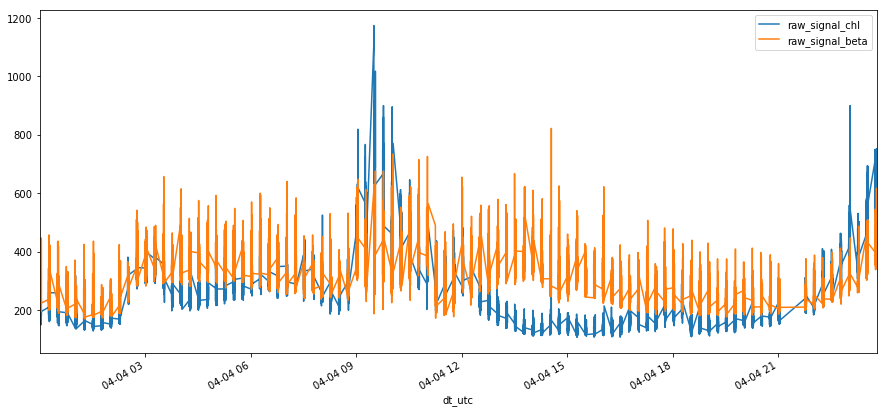

In [15]:
df[['raw_signal_chl', 'raw_signal_beta']].plot(figsize=(15,7));